# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | imbituba
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | naukseni
City not found. Skipping...
Processing Record 7 of Set 1 | ciudad pemex
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | la'ie
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | camana
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | sinabang
Processing Record 21 of Set 

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,23.36,84,79,5.01,MG,1703025554
1,yellowknife,62.4560,-114.3525,-22.47,84,75,4.63,CA,1703025554
2,edinburgh of the seven seas,-37.0676,-12.3116,16.61,92,88,8.51,SH,1703025554
3,imbituba,-28.2400,-48.6703,23.61,89,20,5.54,BR,1703025406
4,ciudad pemex,17.9000,-92.5000,23.34,83,24,2.31,MX,1703025554


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,23.36,84,79,5.01,MG,1703025554
1,yellowknife,62.4560,-114.3525,-22.47,84,75,4.63,CA,1703025554
2,edinburgh of the seven seas,-37.0676,-12.3116,16.61,92,88,8.51,SH,1703025554
3,imbituba,-28.2400,-48.6703,23.61,89,20,5.54,BR,1703025406
4,ciudad pemex,17.9000,-92.5000,23.34,83,24,2.31,MX,1703025554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

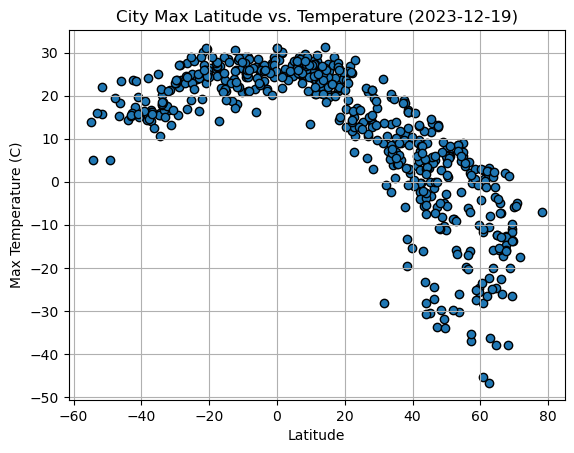

In [60]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
#max_temperature = city_data_df["Max Temp"]
#print(max_temperature.count())
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

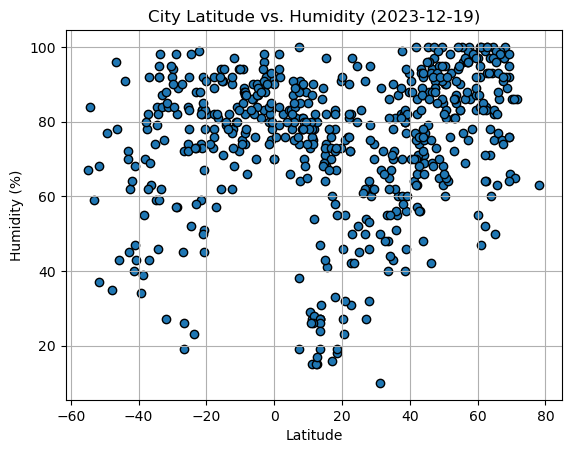

In [63]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = 'black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

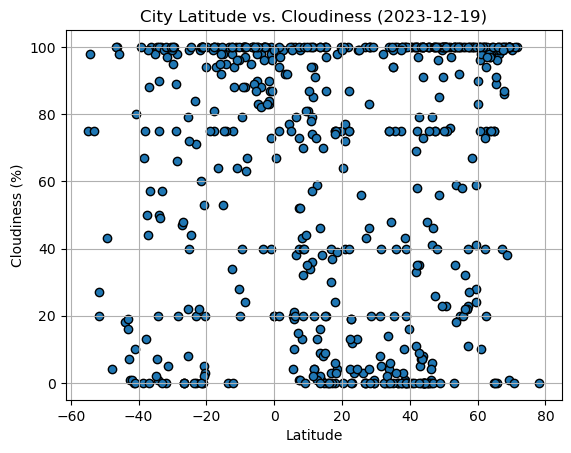

In [66]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

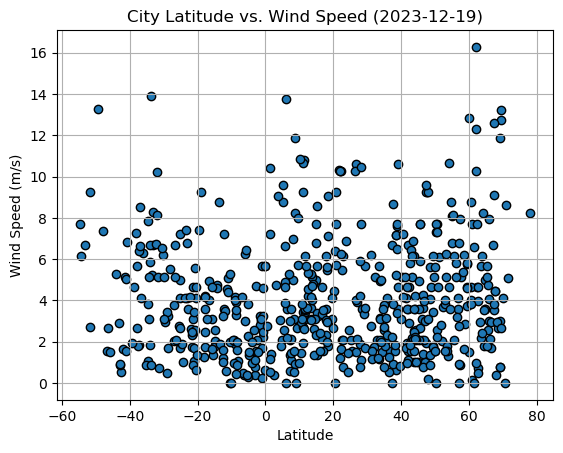

In [68]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    lin_reg = linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) =  linregress (x_values, y_values) 
    regression_values = x_values * slope + intercept
    line_equation = "y = " +str(round(slope,2)) + " x + " + str(round(intercept,2))
    if lin_reg.slope > 0:
        annotation_position = (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) / 10)
    else:
        annotation_position = (x_values.min(), y_values.min() + (y_values.max() - y_values.min()) / 10)

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, 'r')
    plt.annotate(line_equation,annotation_position, color = 'r', fontsize = 13)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value is: {rvalue}')
    plt.show()


In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-22.47,84,75,4.63,CA,1703025554
4,ciudad pemex,17.9000,-92.5000,23.34,83,24,2.31,MX,1703025554
7,la'ie,21.6477,-157.9253,26.98,76,100,10.32,US,1703025554
8,tiksi,71.6872,128.8694,-17.37,86,100,5.09,RU,1703025554
10,cabo san lucas,22.8909,-109.9124,28.17,50,0,6.17,MX,1703025271


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,23.36,84,79,5.01,MG,1703025554
2,edinburgh of the seven seas,-37.0676,-12.3116,16.61,92,88,8.51,SH,1703025554
3,imbituba,-28.2400,-48.6703,23.61,89,20,5.54,BR,1703025406
5,grytviken,-54.2811,-36.5092,5.00,84,98,6.16,GS,1703025554
6,bredasdorp,-34.5322,20.0403,15.90,84,7,1.08,ZA,1703025554


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8225524589029092


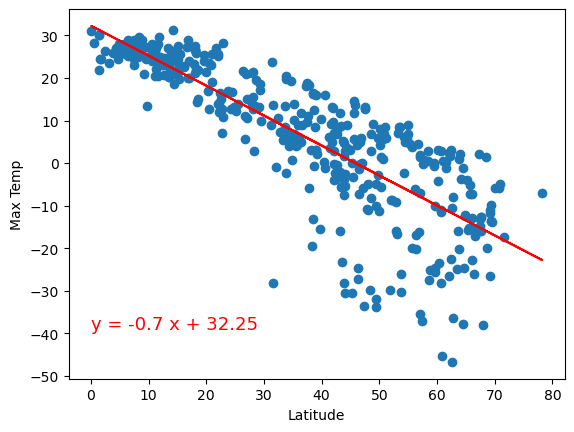

In [99]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.6540359486223614


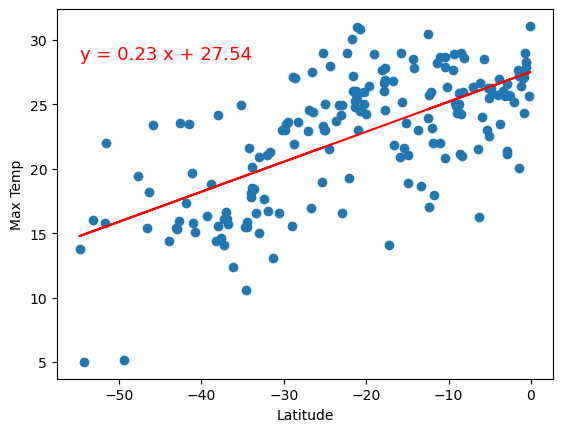

In [100]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** Northern hemisphere : higher latitude, colder max temp
                                              Southern hemisphere: higher latitude, higher max temp

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37135366867568714


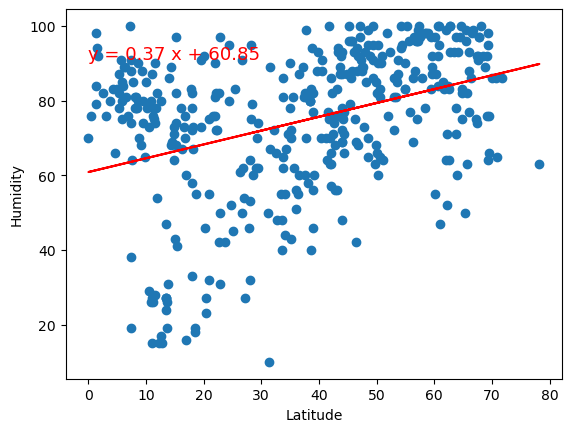

In [102]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.40514571189873255


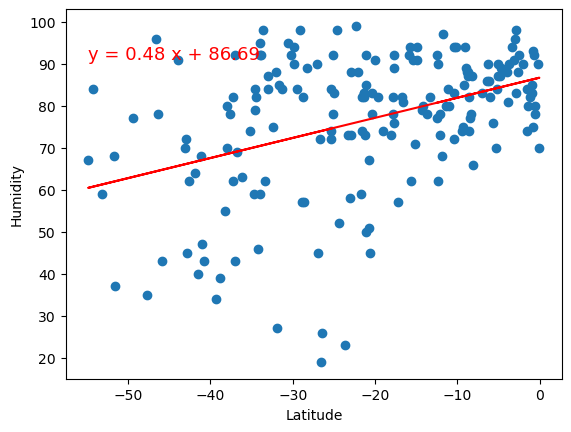

In [103]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** Northern hemisphere humidity can be high all around
                                              Southern hemisphere humidity is generally higher in higher latitudes

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22875196172538653


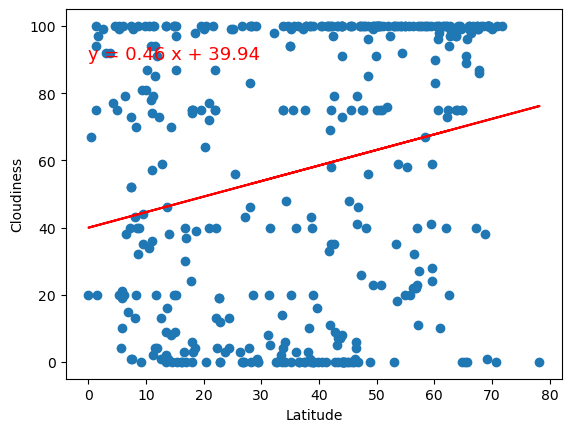

In [104]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.36913099042153774


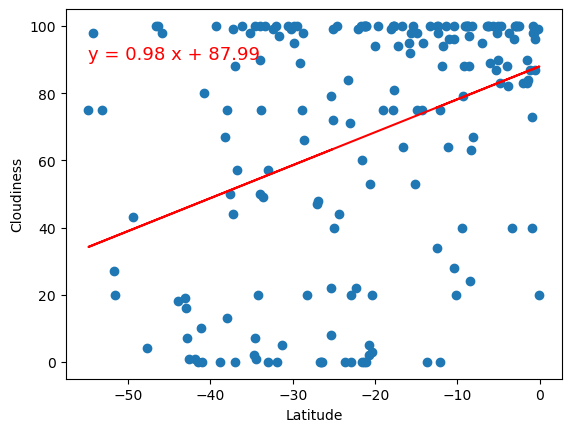

In [105]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** Both hemispheres have similar patterns in cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.051811346622447796


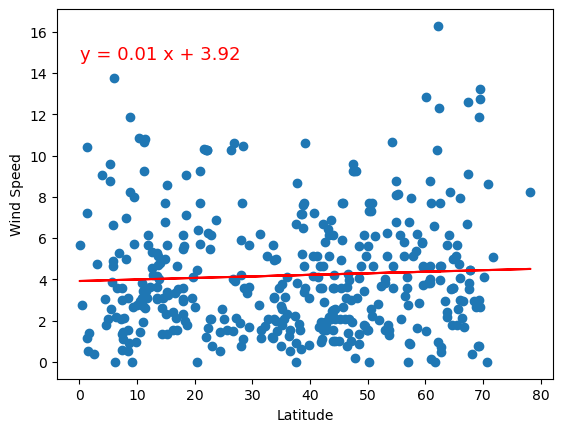

In [106]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: -0.36638567453370946


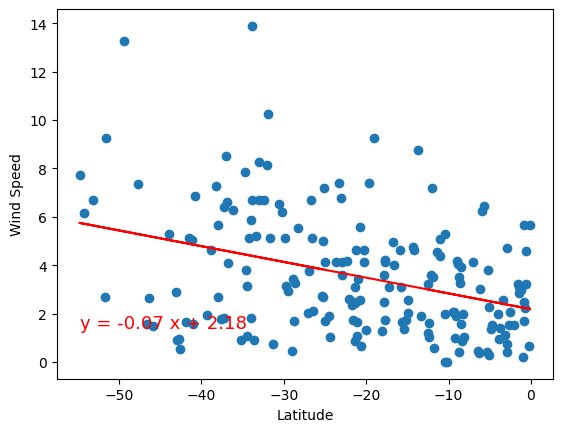

In [107]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Northern hemisphere has higher wind speeds than southern hemisphere